<a href="https://www.kaggle.com/code/ahmdayman/breast-cancer-detection-acc-87?scriptVersionId=237816218" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: black; color: pink; padding: 10px; 
            font-size: 24px; border-radius: 5px; text-align: center;">
    Breast Cancer Detection using Deep Learning Models
</div>
<div style=" color: gray; padding: 10px; 
            font-size: 16px; border-radius: 5px; text-align: center;">
     A Comprehensive Study for Early Detection of Breast Cancer using Medical Imaging and Machine Learning Techniques
</div>
<br>
<div style="color: gray;  text-align: center; font-size: 14px; margin-top: 10px;">
    <strong>Author:</strong> Ahmed Ayman <br>
    <strong>Date:</strong> May 2025 <br>
</div>


<div style="background-color: black; color: white; padding: 15px;  
            font-size: 18px; border-radius: 8px; font-weight: bold;">
    -> 🎗️ Welcome to the Breast Cancer Detection System! 🧬 <br>
    -> This AI-powered model utilizes the strength of <strong>EfficientNetB3</strong> to detect breast cancer from medical images with high accuracy. <br>
    -> By analyzing diagnostic data, it supports doctors and researchers in early detection and better patient outcomes. <br>
    -> 🚀 Together, let's advance medical diagnostics through deep learning!  
</div>


<img src="https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20230605052957/ri/1000/src/images/Article_Images/ImageForArticle_23760_16859573969972585.jpg" 
     alt="Breast Cancer Detection" 
     style="width: 100%; border-radius: 10px; margin-top: 15px;" />


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Import Necessary Libraries
</div>


In [3]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

2025-05-02 15:19:56.864096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746199197.078188      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746199197.145759      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Load the Data
</div>

In [4]:
Train_df = '/kaggle/input/breast-histopathology-images'

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Collecting file paths and their corresponding labels from training directory

</div>

In [5]:
filepaths = []
labels = []

fold_dir = os.listdir(Train_df)

for fold in fold_dir:
    FoldPath = os.path.join(Train_df, fold)

    for label_folder in ["0", "1"]:
        class_path = os.path.join(FoldPath, label_folder)
        if not os.path.exists(class_path):
            continue
        
        for file in tqdm(os.listdir(class_path)):
            file_path = os.path.join(class_path, file)
            filepaths.append(file_path)
            labels.append(int(label_folder))

100%|██████████| 232/232 [00:00<00:00, 426976.10it/s]


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Explore data
</div>

In [6]:
print(len(filepaths))
print(len(labels))

277524
277524


In [7]:
print(labels[-1])

1


In [8]:
labels = ['no cancer' if label == 0 else 'cancer' for label in labels]



In [9]:
print(labels[-1])

cancer


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Creating DataFrames for training  data

</div>


In [10]:
df_train = pd.DataFrame(
    data = {
        'filepath': filepaths,
        'label': labels
    }
)

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Explore data
</div>

In [11]:
df_train.head()

,filepath,label
0,/kaggle/input/breast-histopathology-images/102...,no cancer
1,/kaggle/input/breast-histopathology-images/102...,no cancer
2,/kaggle/input/breast-histopathology-images/102...,no cancer
3,/kaggle/input/breast-histopathology-images/102...,no cancer
4,/kaggle/input/breast-histopathology-images/102...,no cancer


In [12]:
df_train.sample(14)

,filepath,label
11512,/kaggle/input/breast-histopathology-images/129...,cancer
24306,/kaggle/input/breast-histopathology-images/917...,no cancer
181863,/kaggle/input/breast-histopathology-images/139...,no cancer
188669,/kaggle/input/breast-histopathology-images/158...,no cancer
262174,/kaggle/input/breast-histopathology-images/128...,cancer
148360,/kaggle/input/breast-histopathology-images/127...,no cancer
65,/kaggle/input/breast-histopathology-images/102...,no cancer
115578,/kaggle/input/breast-histopathology-images/141...,cancer
36853,/kaggle/input/breast-histopathology-images/128...,no cancer
181592,/kaggle/input/breast-histopathology-images/139...,no cancer


In [13]:
print(df_train['label'].dtype)

object


In [14]:
print(len(filepaths))
print(len(labels))

277524
277524


In [15]:
print(np.unique(df_train['label']))

['cancer' 'no cancer']


In [16]:
df_train.sample(10)

,filepath,label
26266,/kaggle/input/breast-histopathology-images/898...,no cancer
194022,/kaggle/input/breast-histopathology-images/902...,no cancer
11773,/kaggle/input/breast-histopathology-images/129...,cancer
138795,/kaggle/input/breast-histopathology-images/938...,no cancer
270689,/kaggle/input/breast-histopathology-images/925...,no cancer
100110,/kaggle/input/breast-histopathology-images/155...,no cancer
43025,/kaggle/input/breast-histopathology-images/129...,cancer
233569,/kaggle/input/breast-histopathology-images/128...,no cancer
28800,/kaggle/input/breast-histopathology-images/129...,no cancer
242915,/kaggle/input/breast-histopathology-images/141...,no cancer


In [17]:
color = ['#F5EEDD','#077A7D']

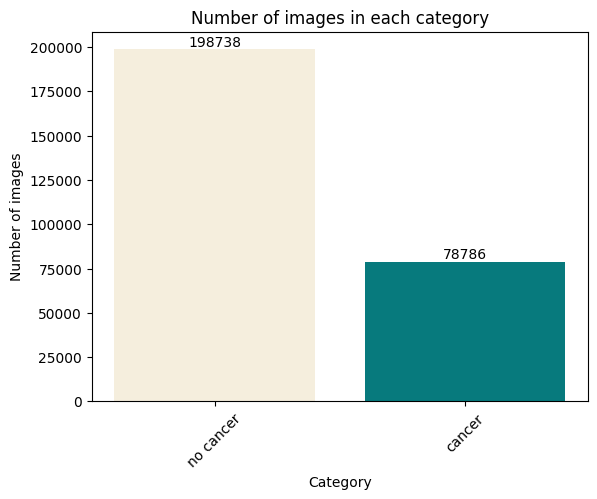

In [18]:
fig, ax = plt.subplots()
bars = ax.bar(df_train['label'].unique(), df_train['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')
plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
      Balancing the dataset by downsampling the majority class ("no cancer")
</div>

<img src="https://media.licdn.com/dms/image/v2/D5612AQEDUcPt2omz7w/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1713722651220?e=1752105600&v=beta&t=fvyCD37UMI0gpWDiza3EiFoMAHWjlkiTOa6D91tQguE" 
     alt="Breast Cancer Detection" 
     style="width: 70%; border-radius: 10px; margin: 15px auto; display: block;" />



In [19]:
from sklearn.utils import resample

df_nocancer = df_train[df_train['label'] == "no cancer"]
df_cancer = df_train[df_train['label'] == "cancer"]


df_nocancer_downsampled = resample(df_nocancer,
                                   replace=False, 
                                   n_samples=len(df_cancer), 
                                   random_state=42)


df_train = pd.concat([df_nocancer_downsampled, df_cancer])

df_train = df_train.sample(frac=1).reset_index(drop=True)


In [20]:
print(df_train['label'].value_counts())

label
cancer       78786
no cancer    78786
Name: count, dtype: int64


In [21]:
print(df_train['label'].value_counts())

label
cancer       78786
no cancer    78786
Name: count, dtype: int64


In [22]:
print(df_train['label'].unique())


['cancer' 'no cancer']



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Displaying class distribution after balancing the dataset
</div>

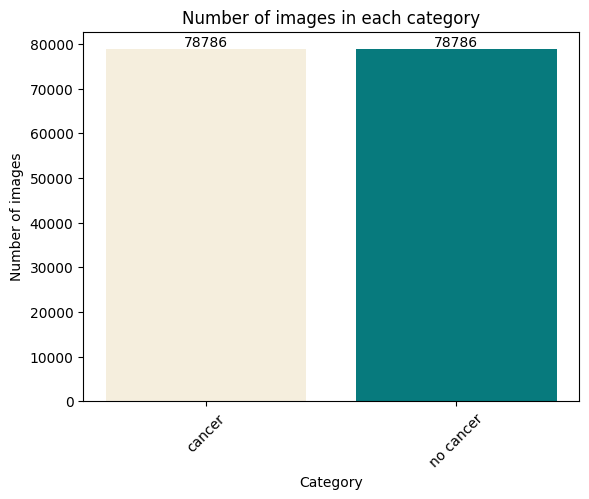

In [23]:
fig, ax = plt.subplots()
bars = ax.bar(df_train['label'].unique(), df_train['label'].value_counts(),color=color)
ax.bar_label(bars)
plt.title('Number of images in each category')

plt.xlabel('Category')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

plt.show()

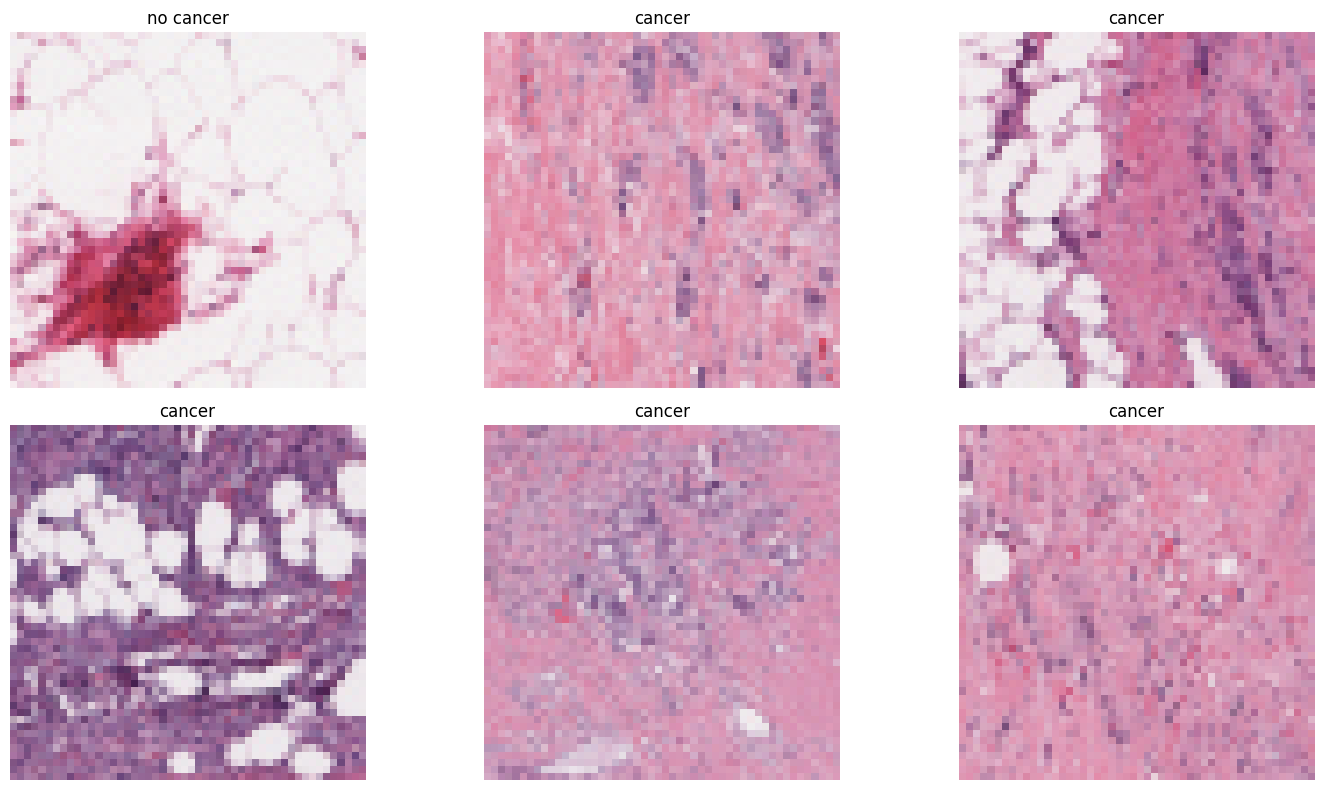

In [24]:
sampled_rows = df_train.sample(n=6)

plt.figure(figsize=(15, 8))

for i, (_, row) in enumerate(sampled_rows.iterrows()):
    img_path = row['filepath'] 
    label = row['label'] 

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(label) 
    plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
train_df, temp_df = train_test_split(
    df_train,
    test_size=0.3,
    stratify=df_train['label'],
    random_state=42
)



val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['label'],
    random_state=42
)

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
      Creating ImageDataGenerator for data augmentation and normalization

</div>


In [26]:
tr_gen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=15,
    fill_mode='nearest',
   
     )

ts_gen = ImageDataGenerator(rescale=1/255)

valid_gen = ImageDataGenerator(rescale=1./255)

batchsize = 64
img_size = (224,224)

In [31]:
gen_train = tr_gen.flow_from_dataframe(train_df, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_valid = valid_gen.flow_from_dataframe(val_df, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=True,color_mode='rgb')
gen_test = ts_gen.flow_from_dataframe(test_df, x_col='filepath', y_col='label', target_size=img_size, class_mode='categorical', batch_size=batchsize, shuffle=False ,color_mode='rgb')

Found 110300 validated image filenames belonging to 2 classes.
Found 23636 validated image filenames belonging to 2 classes.
Found 23636 validated image filenames belonging to 2 classes.


In [38]:
print("Train data:", train_df['label'].value_counts())
print("Val data :", val_df['label'].value_counts())
print("Test data :", test_df['label'].value_counts())

Train data: label
no cancer    55150
cancer       55150
Name: count, dtype: int64
Val data : label
no cancer    11818
cancer       11818
Name: count, dtype: int64
Test data : label
no cancer    11818
cancer       11818
Name: count, dtype: int64



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Retrieving class indices mapping from the training generator
</div>

In [39]:
class_dict = gen_train.class_indices
class_dict

{'cancer': 0, 'no cancer': 1}


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Creating a Convolutional Neural Network (CNN) model
</div>


In [29]:
Model = Sequential([
    Conv2D(64, kernel_size= (3,3), activation='relu', input_shape=(img_size[0],img_size[1],3)),
    Conv2D(64, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, kernel_size= (3,3), activation='relu'),
    Conv2D(128, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(265, kernel_size= (3,3), activation='relu'),
    Conv2D(265, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(512, kernel_size= (3,3), activation='relu'),
    Conv2D(512, kernel_size= (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(2, activation='softmax') ])

I0000 00:00:1746052133.148125      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [30]:
Model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = Model.fit(
    gen_train, 
    epochs=5,
    validation_data=gen_valid, 
    verbose=1, 
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

Epoch 1/5


I0000 00:00:1746052194.988480      96 service.cc:148] XLA service 0x7a0864016c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746052194.989211      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746052195.467703      96 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-30 22:30:24.997107: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[265,265,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,265,51,51]{3,2,1,0}, f32[64,265,49,49]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-04-30 22:30:27.712905: E external/local_xla/xla

 942/1724 ━━━━━━━━━━━━━━━━━━━━ 13:30 1s/step - accuracy: 0.7303 - loss: 0.5416

2025-04-30 22:47:03.026583: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[265,265,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,265,51,51]{3,2,1,0}, f32[28,265,49,49]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-04-30 22:47:03.654401: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.627914508s
Trying algorithm eng0{} for conv (f32[265,265,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,265,51,51]{3,2,1,0}, f32[28,265,49,49]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","c

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 2065s 1s/step - accuracy: 0.7588 - loss: 0.5048 - val_accuracy: 0.8271 - val_loss: 0.3998
Epoch 2/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1356s 784ms/step - accuracy: 0.8316 - loss: 0.3928 - val_accuracy: 0.8333 - val_loss: 0.3992
Epoch 3/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1345s 777ms/step - accuracy: 0.8450 - loss: 0.3659 - val_accuracy: 0.8625 - val_loss: 0.3365
Epoch 4/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1343s 776ms/step - accuracy: 0.8548 - loss: 0.3455 - val_accuracy: 0.8577 - val_loss: 0.3385
Epoch 5/5
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1353s 782ms/step - accuracy: 0.8595 - loss: 0.3350 - val_accuracy: 0.8671 - val_loss: 0.3259



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
      Evaluating the CNN model on training and validation data
</div>

In [35]:
print(Model.evaluate(gen_train))
print(Model.evaluate(gen_valid))
print(Model.evaluate(gen_test))

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1287s 746ms/step - accuracy: 0.8668 - loss: 0.3183
[0.320591002702713, 0.8666908144950867]
370/370 ━━━━━━━━━━━━━━━━━━━━ 76s 204ms/step - accuracy: 0.8678 - loss: 0.3251
[0.32588690519332886, 0.867109477519989]
370/370 ━━━━━━━━━━━━━━━━━━━━ 213s 577ms/step - accuracy: 0.8646 - loss: 0.3251
[0.3194032907485962, 0.8674479722976685]


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Saving the trained CNN model ACC 85%
</div>

In [36]:
Model.save('Model m.h5')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Making predictions on the validation dataset and extracting class labels
</div>


In [37]:
preds = Model.predict(gen_test)
y_pred = np.argmax(preds, axis=1)

370/370 ━━━━━━━━━━━━━━━━━━━━ 55s 146ms/step


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Plotting a confusion matrix to visualize model performance on validation data

</div>

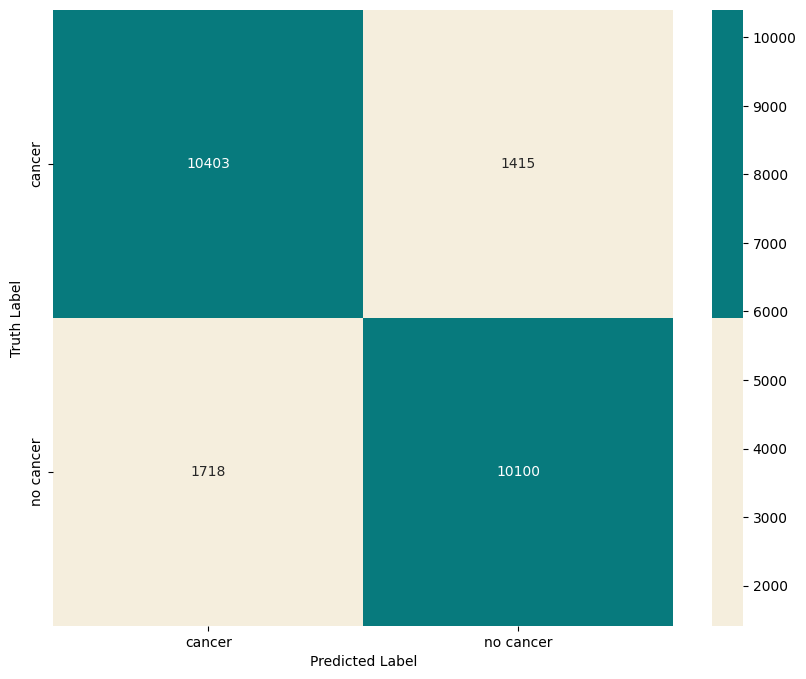

In [38]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Plotting the training and validation accuracy and loss over epochs

</div>


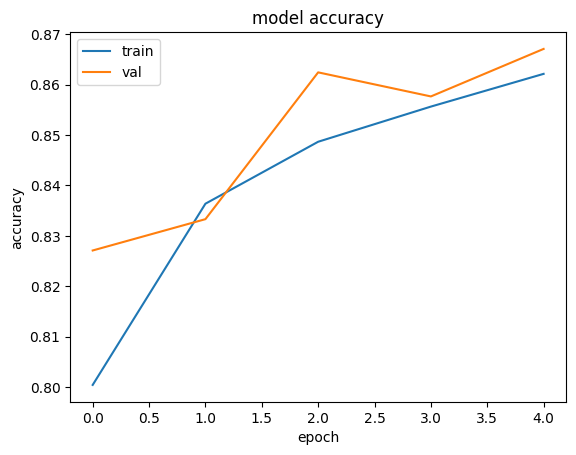

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

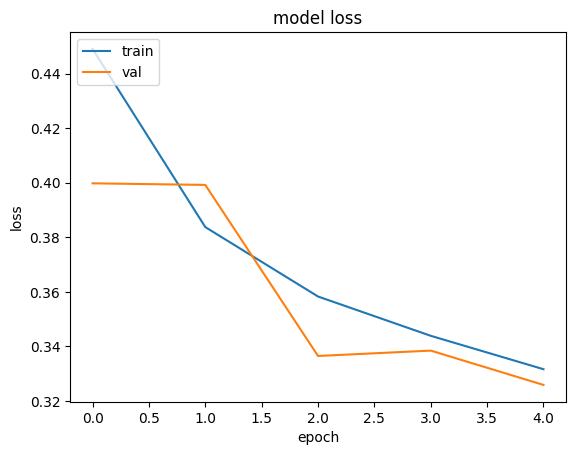

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     predict the class of an input image and visualize probabilities
</div>

In [41]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = Model.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


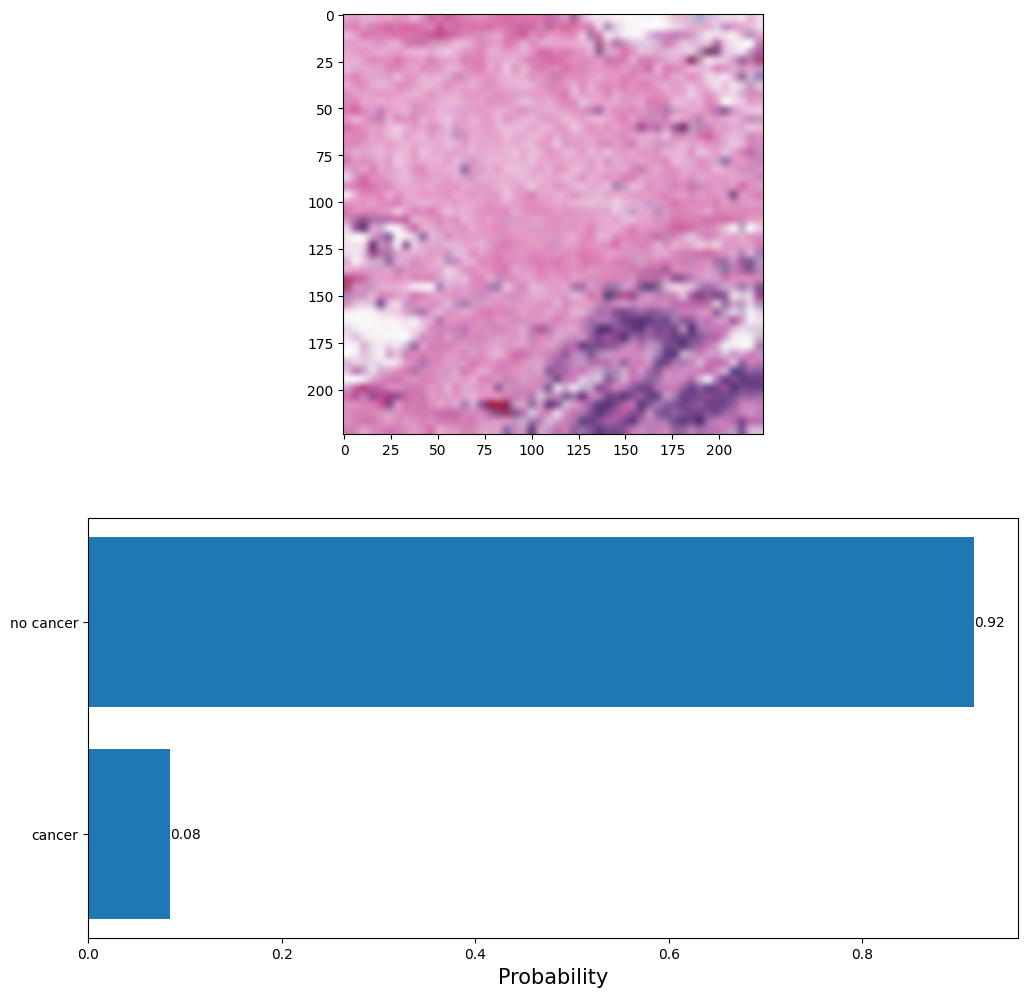

In [42]:
predict('/kaggle/input/breast-histopathology-images/10253/0/10253_idx5_x1001_y1001_class0.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


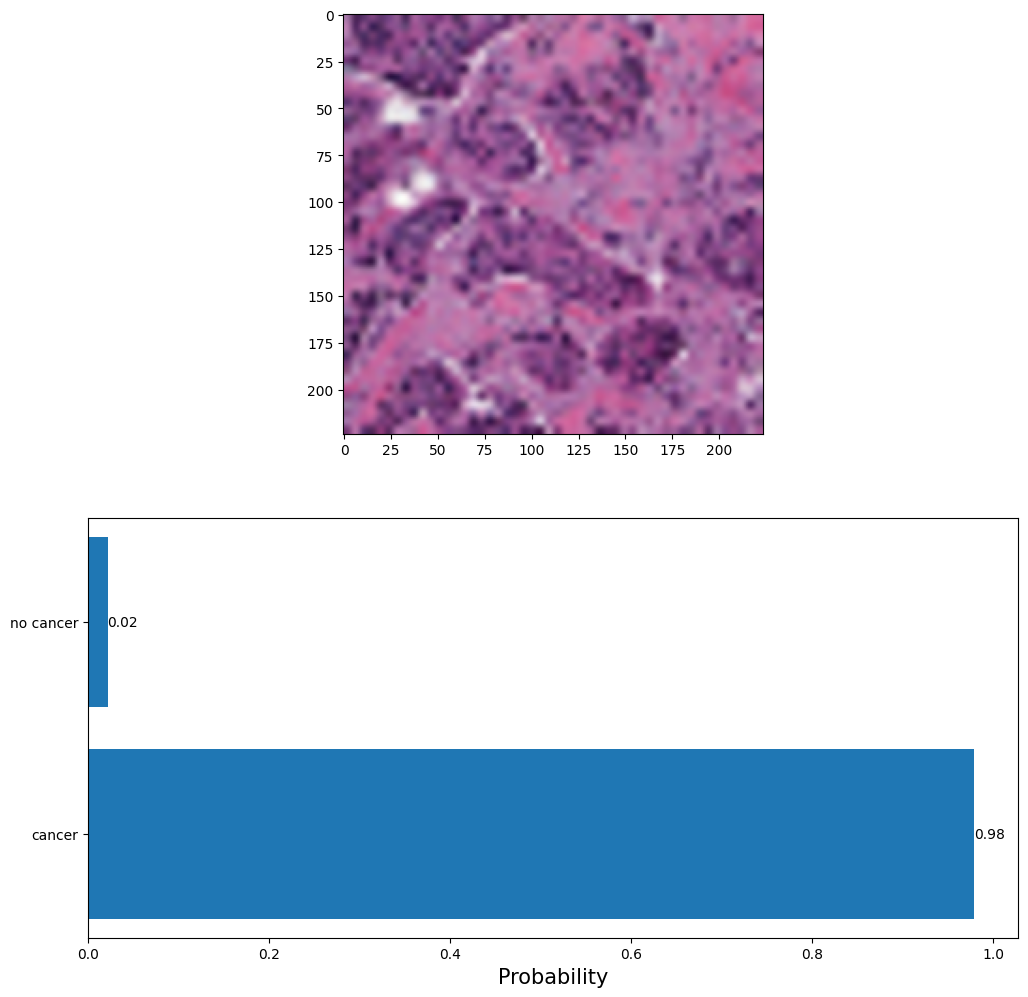

In [44]:
predict('/kaggle/input/breast-histopathology-images/10255/1/10255_idx5_x251_y1001_class1.png')


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Loading the EfficientNetB3 model pre-trained on ImageNet without the top classification layer 
</div>

In [28]:
base_model_EfficientNetB3 = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size[0],img_size[1],3),
    pooling='max',
)

I0000 00:00:1746144279.277668      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
    Building and compiling a Sequential model with a pre-trained EfficientNetB3 base 
</div>

In [29]:
ModelPretrained = Sequential([
    base_model_EfficientNetB3,
    
    Dense(256 , activation='relu'),
  
    Dense(2, activation='softmax')
    
])
ModelPretrained.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
     Training the fine-tuned EfficientNetB3 model with training and validation data
</div>


In [30]:
history_Final = ModelPretrained.fit(
    gen_train, 
    epochs=2, 
    validation_data=gen_valid, 
    verbose=1, 
    
)

Epoch 1/2


I0000 00:00:1746144377.921900     103 service.cc:148] XLA service 0x7b8fd8004a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746144377.922739     103 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746144384.433051     103 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1746144400.606579     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746144400.809143     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746144401.456523     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746144401.6754

 904/1724 ━━━━━━━━━━━━━━━━━━━━ 13:26 984ms/step - accuracy: 0.8180 - loss: 0.7788

E0000 00:00:1746145340.064931     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746145340.259117     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746145340.791566     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746145341.012196     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1746145341.412955     103 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 2055s 1s/step - accuracy: 0.8361 - loss: 0.5903 - val_accuracy: 0.8799 - val_loss: 0.2842
Epoch 2/2
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1316s 760ms/step - accuracy: 0.8888 - loss: 0.2712 - val_accuracy: 0.8757 - val_loss: 0.3181


<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
    Evaluating the fine-tuned EfficientNetB3 model on training and validation datasets 
</div>


In [31]:
train_score = ModelPretrained.evaluate(gen_train, verbose=1)
valid_score = ModelPretrained.evaluate(gen_valid, verbose=1)
test_score = ModelPretrained.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1240s 719ms/step - accuracy: 0.8887 - loss: 0.2808
370/370 ━━━━━━━━━━━━━━━━━━━━ 55s 149ms/step - accuracy: 0.8790 - loss: 0.3060
370/370 ━━━━━━━━━━━━━━━━━━━━ 203s 549ms/step - accuracy: 0.8772 - loss: 0.3028
Train Loss: 0.2776
Train Accuracy: 89.00%
--------------------
Validation Loss: 0.3181
Validation Accuracy: 87.57%
--------------------
Test Loss: 0.3073
Test Accuracy: 87.65%


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Saving the trained CNN model ACC 87%
</div>


In [32]:
ModelPretrained.save('breast_cancer_EfficientNetB3.h5')


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Generating predictions using the fine-tuned EfficientNetB3 model on validation data 
</div>

In [33]:
preds = ModelPretrained.predict(gen_test)
y_pred = np.argmax(preds, axis=1)

370/370 ━━━━━━━━━━━━━━━━━━━━ 75s 177ms/step


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Plotting a confusion matrix to visualize model performance on validation data

</div>

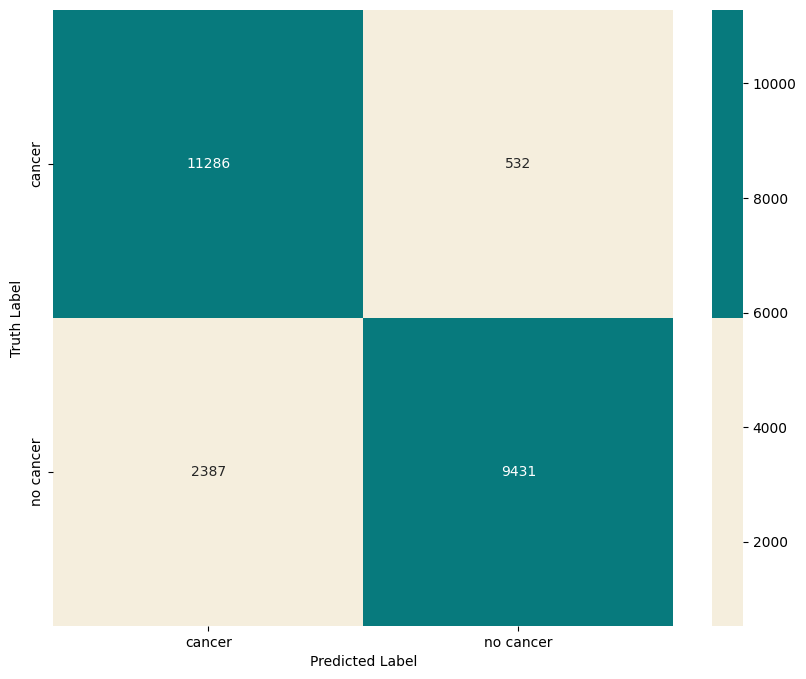

In [34]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Plotting the training and validation accuracy and loss over epochs

</div>

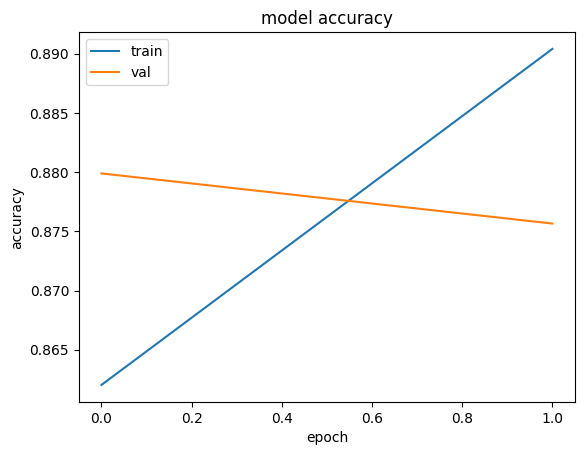

In [36]:
plt.plot(history_Final.history['accuracy'])
plt.plot(history_Final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

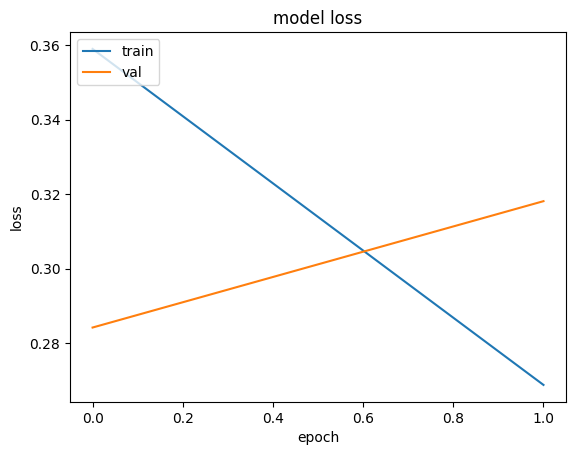

In [37]:
plt.plot(history_Final.history['loss'])
plt.plot(history_Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     predict the class of an input image and visualize probabilities
</div>

In [38]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = ModelPretrained.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


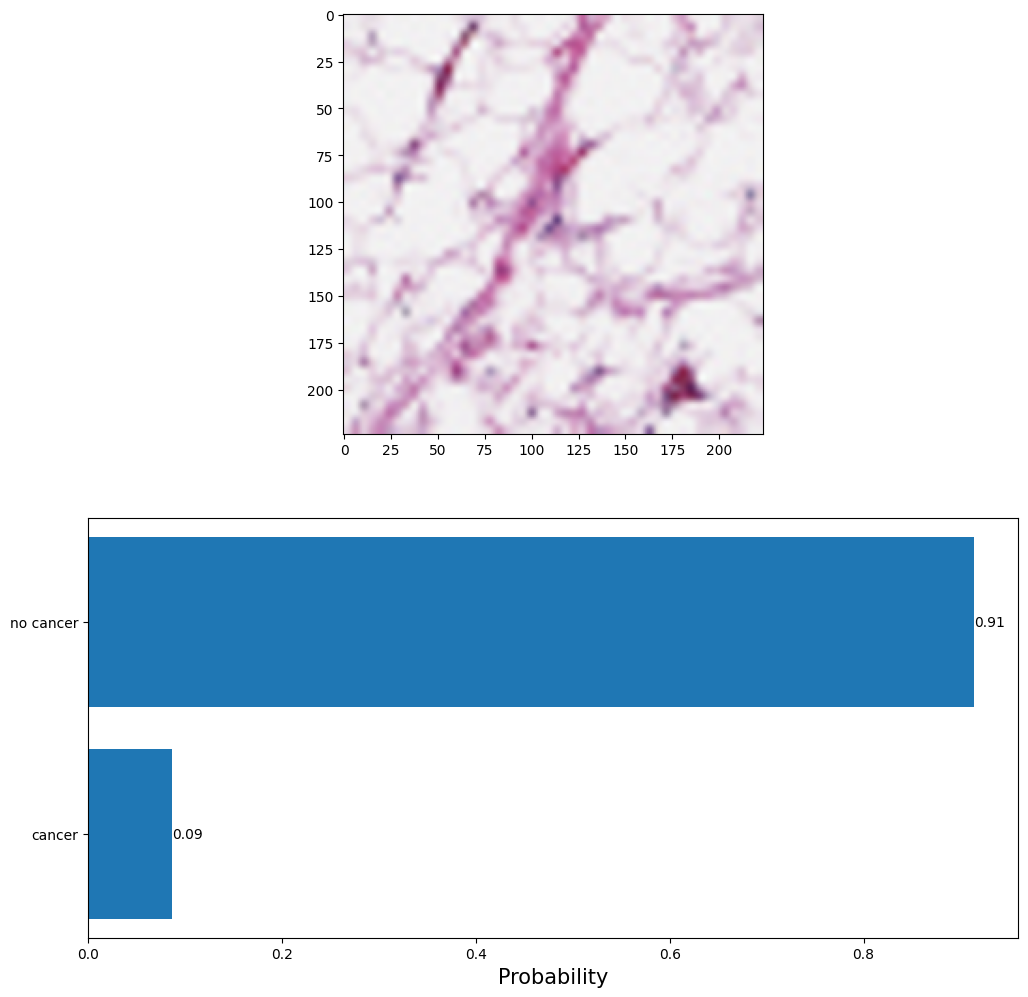

In [39]:
predict('/kaggle/input/breast-histopathology-images/10257/0/10257_idx5_x1151_y1801_class0.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


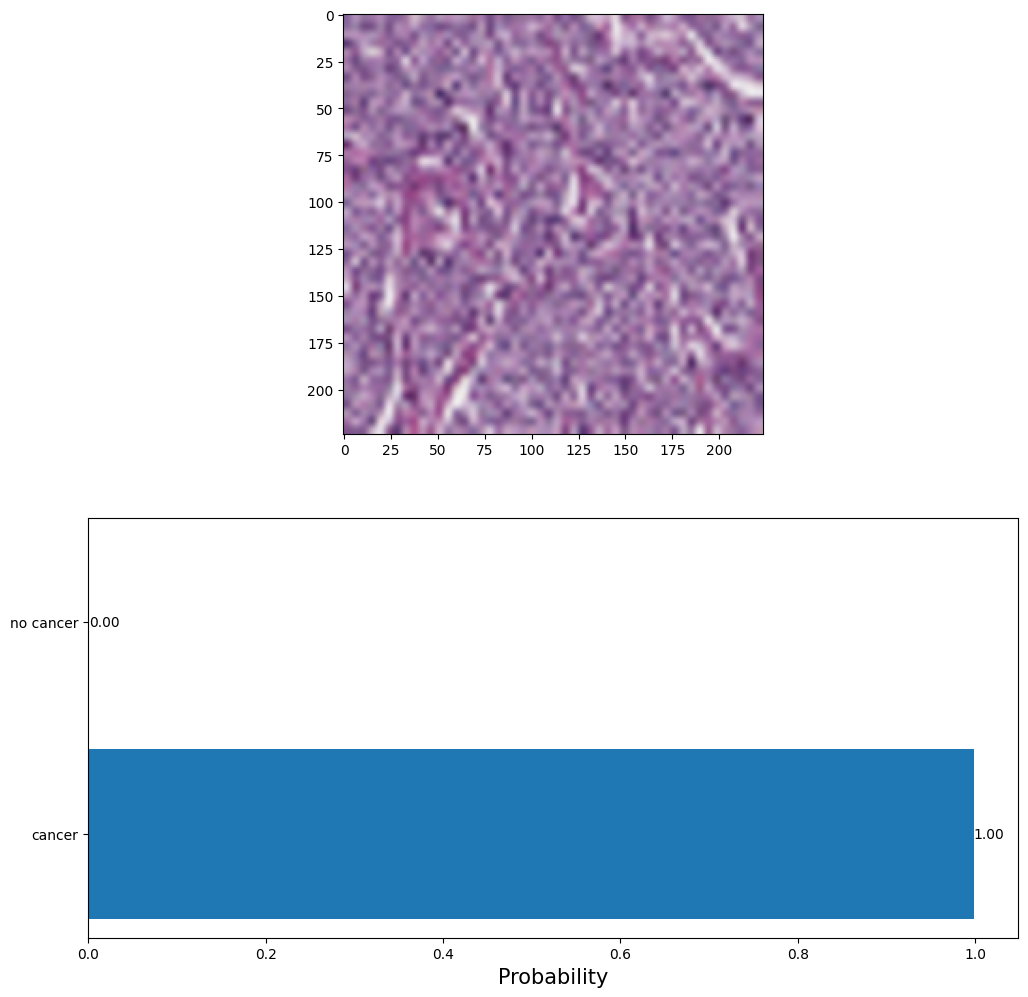

In [40]:
predict('/kaggle/input/breast-histopathology-images/10299/1/10299_idx5_x1001_y1401_class1.png')


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Loading the VGG16 model pre-trained on ImageNet without the top classification layer 
</div>

In [28]:
base_model_VGG16 = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",    
    input_shape=(img_size[0],img_size[1],3),
    pooling='max',
    classifier_activation="softmax",
    name="vgg16",
    
   
)

I0000 00:00:1746199350.396615      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
    Building and compiling a Sequential model with a pre-trained VGG16 base 
</div>

In [29]:
ModelPretrained_VGG16 = Sequential([
    base_model_VGG16,
    
    Dense(256 , activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
    
])
ModelPretrained_VGG16.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
     Training the fine-tuned VGG16 model with training and validation data
</div>

In [32]:
history_Final = ModelPretrained_VGG16.fit(
    gen_train, 
    epochs=2, 
    validation_data=gen_valid, 
    verbose=1, 
    
)

Epoch 1/2


I0000 00:00:1746199871.264558     102 service.cc:148] XLA service 0x7dde14002c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746199871.267374     102 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746199871.987443     102 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746199908.441869     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1724/1724 ━━━━━━━━━━━━━━━━━━━━ 2329s 1s/step - accuracy: 0.7573 - loss: 0.5130 - val_accuracy: 0.8399 - val_loss: 0.3710
Epoch 2/2
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1426s 824ms/step - accuracy: 0.8504 - loss: 0.3545 - val_accuracy: 0.8692 - val_loss: 0.3156


<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
    Evaluating the fine-tuned VGG16 model on training and validation datasets 
</div>

In [33]:
train_score = ModelPretrained_VGG16.evaluate(gen_train, verbose=1)
valid_score = ModelPretrained_VGG16.evaluate(gen_valid, verbose=1)
test_score = ModelPretrained_VGG16.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1303s 756ms/step - accuracy: 0.8671 - loss: 0.3150
370/370 ━━━━━━━━━━━━━━━━━━━━ 75s 202ms/step - accuracy: 0.8688 - loss: 0.3216
370/370 ━━━━━━━━━━━━━━━━━━━━ 211s 572ms/step - accuracy: 0.8678 - loss: 0.3210
Train Loss: 0.3150
Train Accuracy: 86.78%
--------------------
Validation Loss: 0.3156
Validation Accuracy: 86.92%
--------------------
Test Loss: 0.3215
Test Accuracy: 86.67%


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Generating predictions using the fine-tuned VGG16 model on validation data 
</div>

In [34]:
preds = ModelPretrained_VGG16.predict(gen_test)
y_pred = np.argmax(preds, axis=1)

370/370 ━━━━━━━━━━━━━━━━━━━━ 56s 150ms/step


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Saving the trained CNN model ACC 86%
</div>


In [36]:
ModelPretrained_VGG16.save('breast_cancer_VGG16.h5')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Plotting a confusion matrix to visualize model performance on validation data

</div>

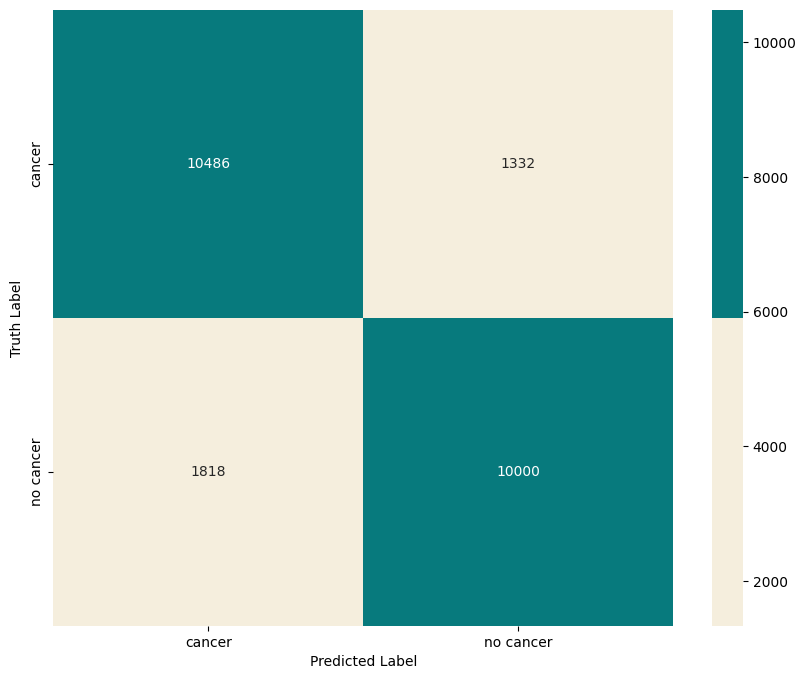

In [40]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Plotting the training and validation accuracy and loss over epochs

</div>

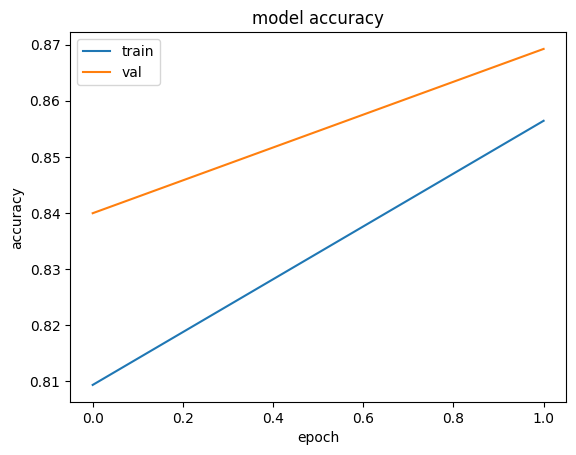

In [41]:
plt.plot(history_Final.history['accuracy'])
plt.plot(history_Final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

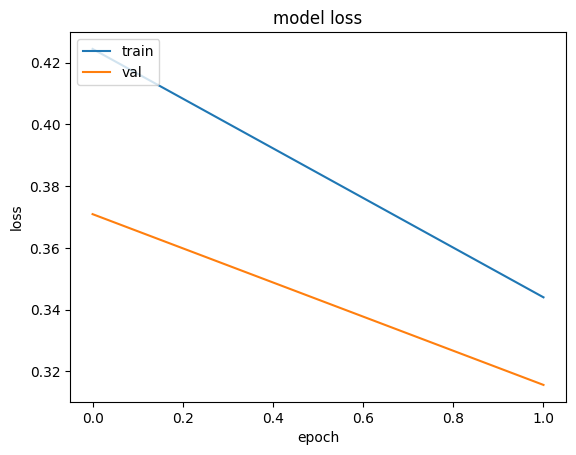

In [42]:
plt.plot(history_Final.history['loss'])
plt.plot(history_Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     predict the class of an input image and visualize probabilities
</div>

In [43]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = ModelPretrained_VGG16.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


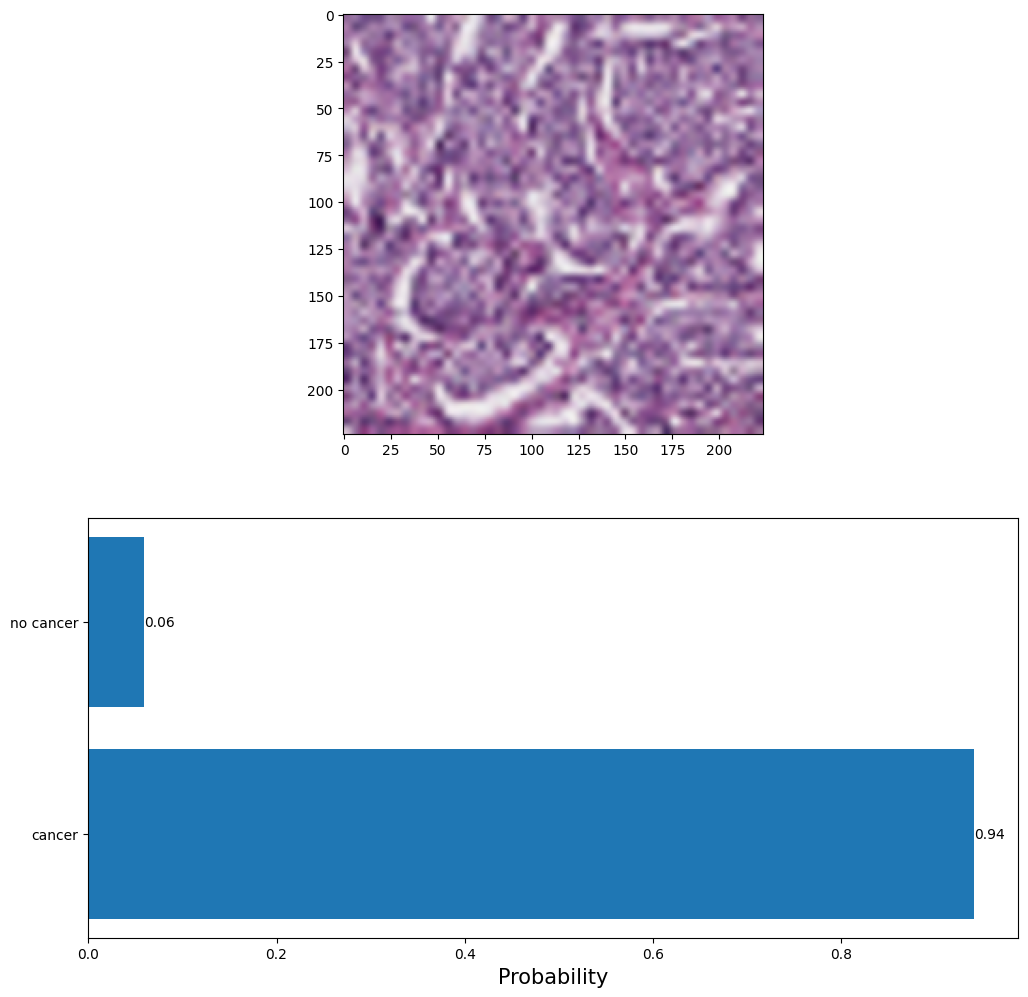

In [44]:
predict('/kaggle/input/breast-histopathology-images/10299/1/10299_idx5_x1001_y1501_class1.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


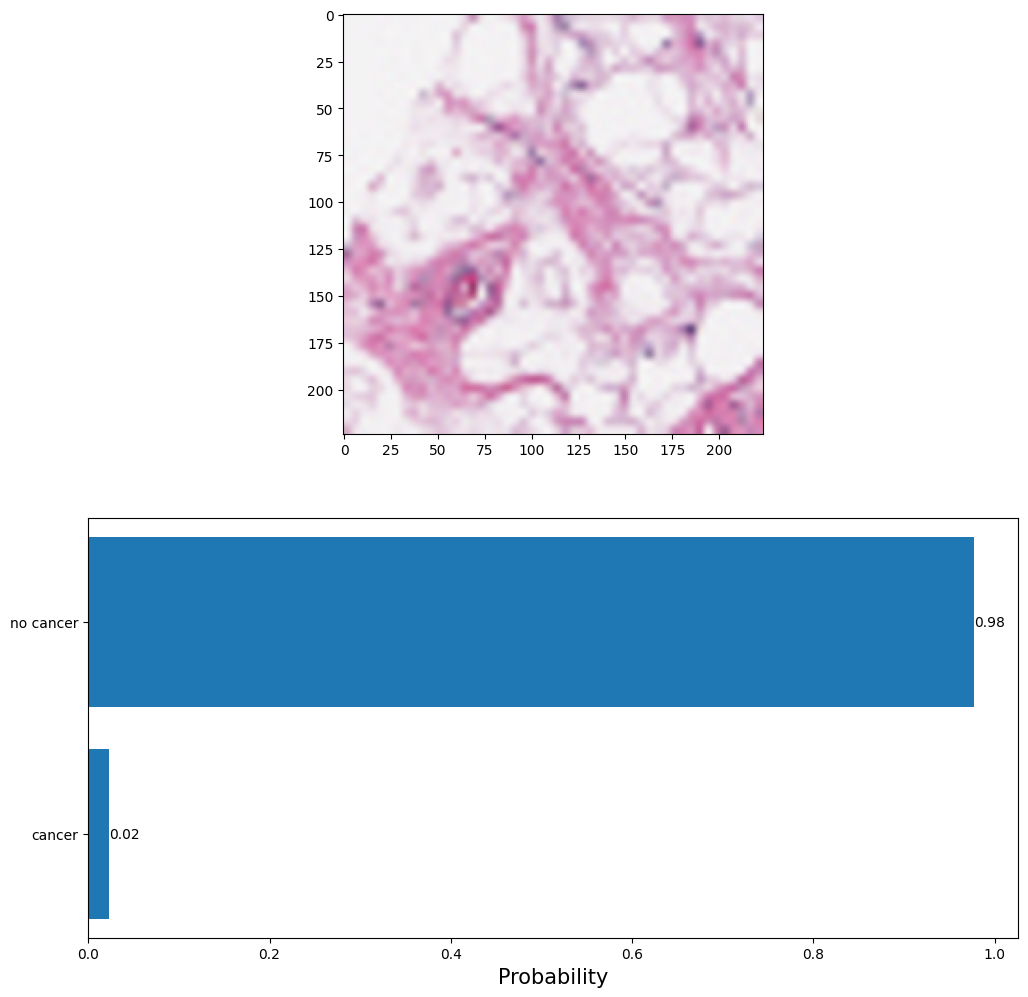

In [45]:
predict('/kaggle/input/breast-histopathology-images/10299/0/10299_idx5_x101_y251_class0.png')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Loading the ResNet50 model pre-trained on ImageNet without the top classification layer 
</div>


In [46]:
base_model_ResNet50 = keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(img_size[0],img_size[1],3),
    pooling='max',
    classifier_activation="softmax",
    name="resnet50",
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
    Building and compiling a Sequential model with a pre-trained ResNet50 base 
</div>

In [47]:
ModelPretrainedResNet50 = Sequential([
    base_model_ResNet50,
    
    Dense(256 , activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
    
])
ModelPretrainedResNet50.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
     Training the fine-tuned ResNet50 model with training and validation data
</div>


In [48]:
history_Final = ModelPretrainedResNet50.fit(
    gen_train, 
    epochs=2, 
    validation_data=gen_valid, 
    verbose=1, 
    
)

Epoch 1/2
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1472s 810ms/step - accuracy: 0.8269 - loss: 0.6094 - val_accuracy: 0.8509 - val_loss: 0.3574
Epoch 2/2
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1315s 760ms/step - accuracy: 0.8649 - loss: 0.3254 - val_accuracy: 0.8757 - val_loss: 0.3432


<div style="background-color: black; color: gold; padding: 10px; 
            font-size: 20px; border-radius: 5px; text-align: center;">
    Evaluating the fine-tuned ResNet50 model on training and validation datasets 
</div>

In [49]:
train_score = ModelPretrainedResNet50.evaluate(gen_train, verbose=1)
valid_score = ModelPretrainedResNet50.evaluate(gen_valid, verbose=1)
test_score = ModelPretrainedResNet50.evaluate(gen_test, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1259s 730ms/step - accuracy: 0.8789 - loss: 0.3209
370/370 ━━━━━━━━━━━━━━━━━━━━ 80s 216ms/step - accuracy: 0.8761 - loss: 0.3478
370/370 ━━━━━━━━━━━━━━━━━━━━ 77s 209ms/step - accuracy: 0.8748 - loss: 0.3538
Train Loss: 0.3234
Train Accuracy: 87.89%
--------------------
Validation Loss: 0.3432
Validation Accuracy: 87.57%
--------------------
Test Loss: 0.3563
Test Accuracy: 87.48%


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Generating predictions using the fine-tuned EfficientNetB3 model on validation data 
</div>

In [50]:
preds = ModelPretrained_VGG16.predict(gen_test)
y_pred = np.argmax(preds, axis=1)

370/370 ━━━━━━━━━━━━━━━━━━━━ 56s 151ms/step



<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Saving the trained CNN model ACC 87%
</div>

In [51]:
ModelPretrained_VGG16.save('breast_cancer_VGG16.h5')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    Plotting a confusion matrix to visualize model performance on validation data

</div>

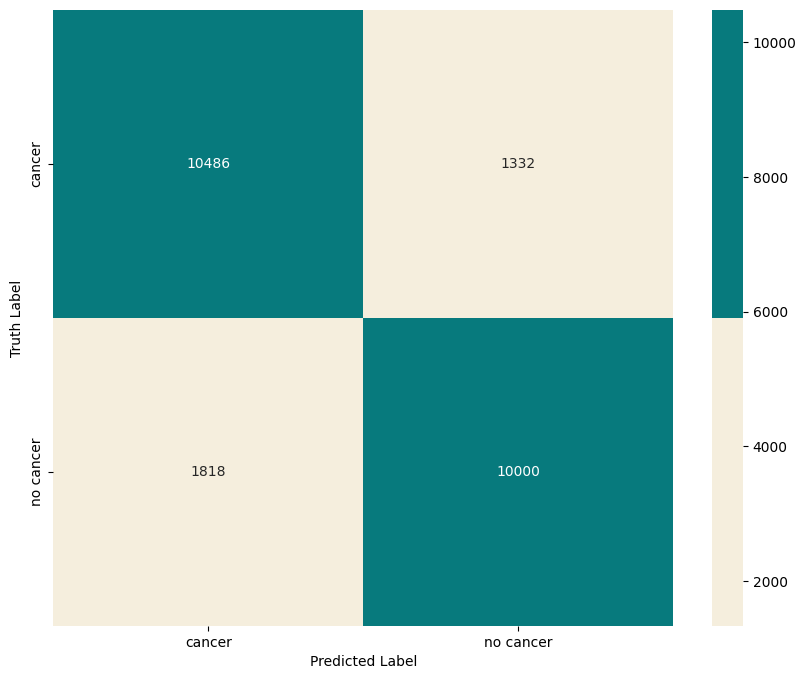

In [52]:
cm = confusion_matrix(gen_test.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     Plotting the training and validation accuracy and loss over epochs

</div>

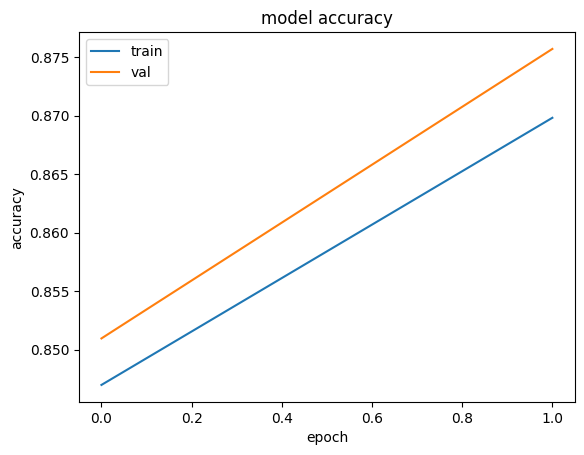

In [53]:
plt.plot(history_Final.history['accuracy'])
plt.plot(history_Final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

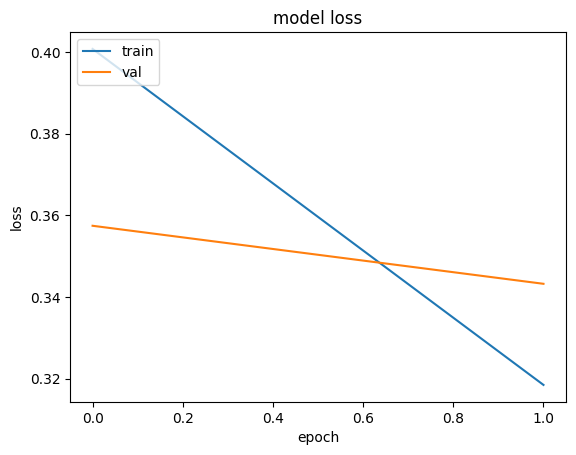

In [54]:
plt.plot(history_Final.history['loss'])
plt.plot(history_Final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
     predict the class of an input image and visualize probabilities
</div>

In [55]:
def predict(img_path):

    
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = ModelPretrainedResNet50.predict(img)
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


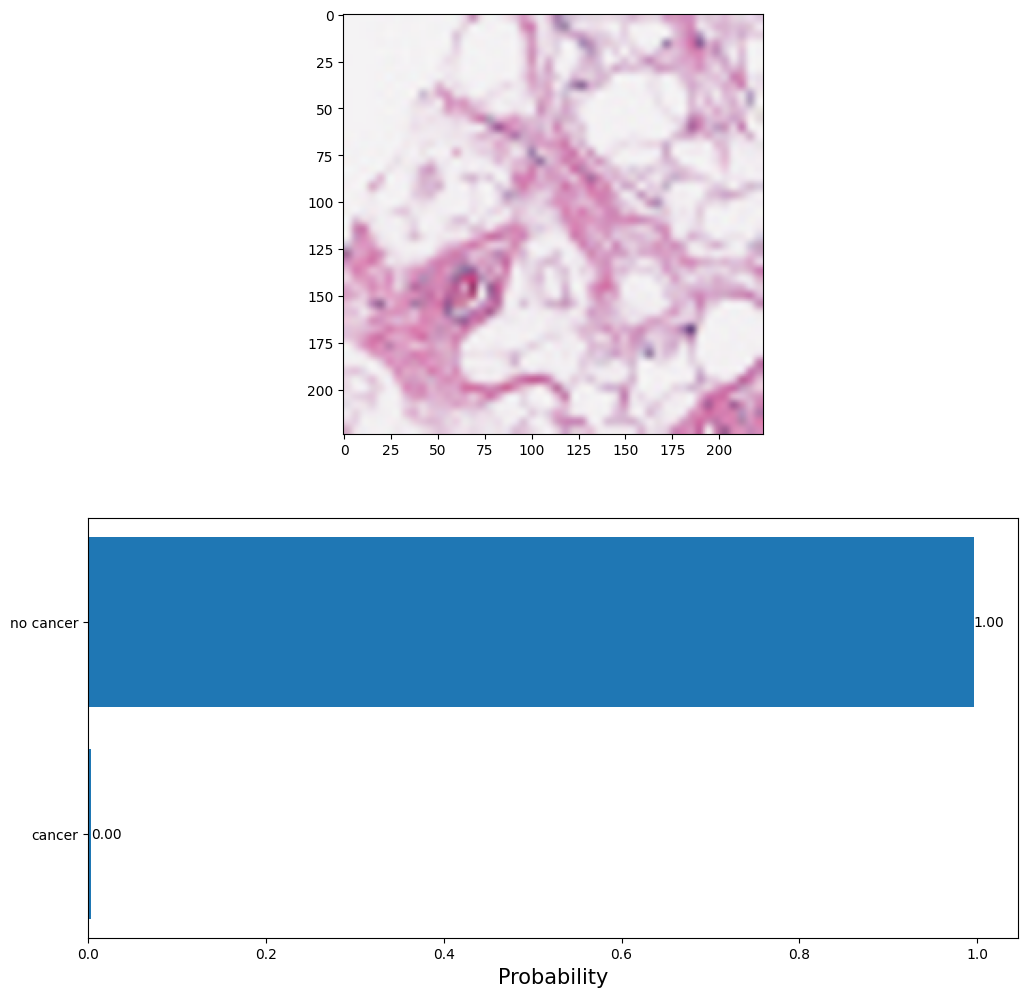

In [56]:
predict('/kaggle/input/breast-histopathology-images/10299/0/10299_idx5_x101_y251_class0.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


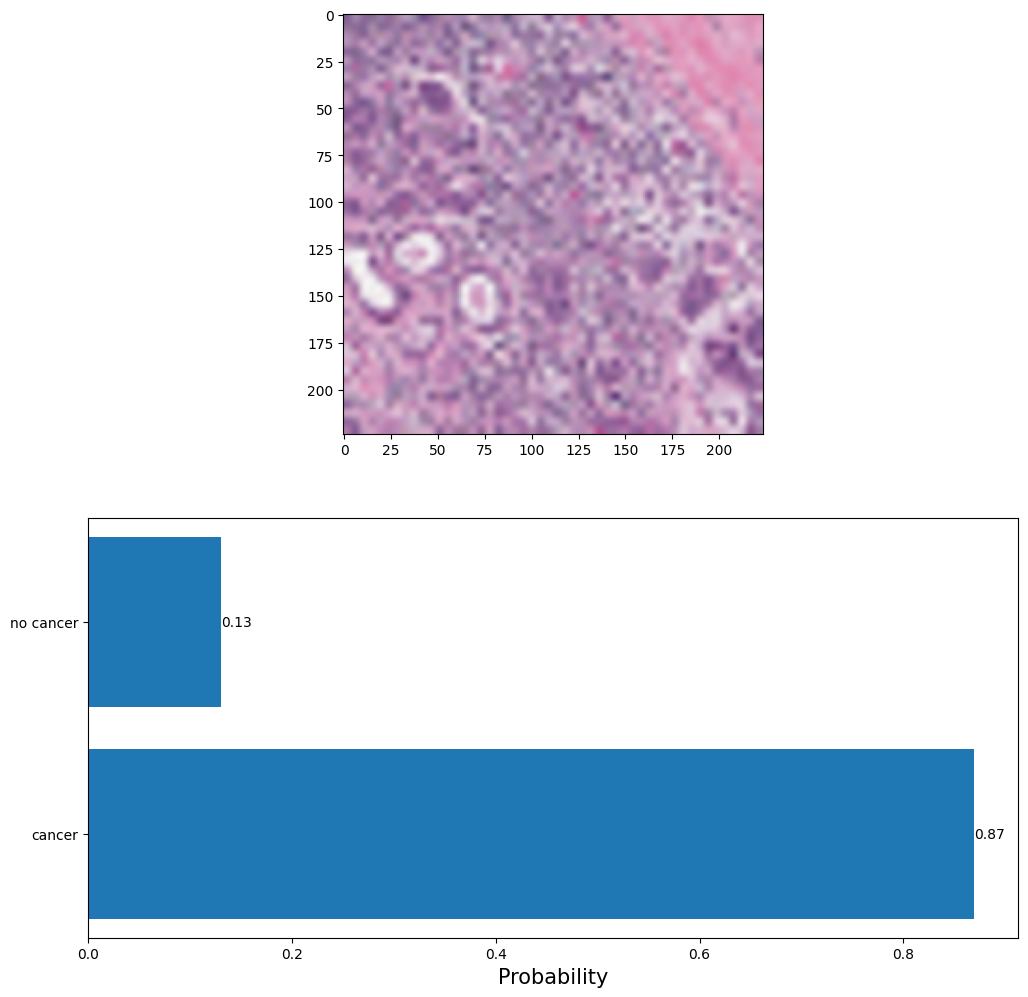

In [57]:
predict('/kaggle/input/breast-histopathology-images/10303/1/10303_idx5_x1001_y1101_class1.png')


<div style="background-color: black; color: gold; padding: 10px; text-align: center; font-size: 20px; border-radius: 5px;">
    📌 If you found this notebook helpful or insightful, don't forget to Upvote 👍 — your support is appreciated

</div>

<img src="https://pic.i7lm.com/wp-content/uploads/2019/06/%D8%B5%D9%88%D8%B1%D8%A9-%D9%85%D8%AA%D8%AD%D8%B1%D9%83%D8%A9-%D9%84%D8%B4%D8%AE%D8%B5%D9%8A%D8%A7%D8%AA-%D9%83%D8%B1%D8%AA%D9%88%D9%86-%D8%B3%D8%A8%D9%88%D9%86%D8%AC-%D8%A8%D9%88%D8%A8.gif" 
     alt="SpongeBob Animation" 
     style="width: 50%; display: block; margin: 20px auto; border-radius: 10px;" />
